In [1]:
# Import necessary libraries
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from C:\Users\ajith\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ajith\AppData\Local\Temp\tmpaimzd_xc
  JVM stdout: C:\Users\ajith\AppData\Local\Temp\tmpaimzd_xc\h2o_ajith_started_from_python.out
  JVM stderr: C:\Users\ajith\AppData\Local\Temp\tmpaimzd_xc\h2o_ajith_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_ajith_zg3xl3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.927 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
# Load the dataset
hourly_data = h2o.import_file("D:\Wk13_14_Graded Assignment\data\hour.csv")
daily_data = h2o.import_file("D:\Wk13_14_Graded Assignment\data\day.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
# Task 1: Explore the dataset
# Display basic statistics, check for missing values, and visualize the data distribution
hourly_data.describe()
daily_data.describe()


Rows:17379
Cols:17

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
type,int,time,int,int,int,int,int,int,int,int,real,real,real,real,int,int,int
mins,1.0,1293840000000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.02,0.0,0.0,0.0,0.0,0.0,1.0
mean,8690.0,1325477314552.0461,2.501639910236492,0.5025605615973301,6.5377754761493785,11.546751826917548,0.028770355026181024,3.003682605443351,0.6827205247712756,1.425283387997008,0.4969871684216584,0.47577510213476026,0.6272288394038784,0.1900976063064618,35.67621842453536,153.78686920996606,189.4630876345014
maxs,17379.0,1356912000000.0,4.0,1.0,12.0,23.0,1.0,6.0,1.0,4.0,1.0,1.0,1.0,0.8507,367.0,886.0,977.0
sigma,5017.029499614288,18150225217.779854,1.1069181394480765,0.5000078290910197,3.438775713750168,6.914405095264493,0.16716527638437123,2.005771456110988,0.4654306335238829,0.6393568777542534,0.19255612124972193,0.17185021563535932,0.19292983406291514,0.1223402285727905,49.30503038705309,151.35728591258314,181.38759909186476
zeros,0,0,0,8645,0,726,16879,2502,5514,0,0,2,22,2180,1581,24,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,2011-01-01 00:00:00,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01 00:00:00,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,8.0,32.0,40.0
2,3.0,2011-01-01 00:00:00,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,5.0,27.0,32.0


Rows:731
Cols:16

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
type,int,time,int,int,int,int,int,int,int,real,real,real,real,int,int,int
mins,1.0,1293840000000.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0591304,0.0790696,0.0,0.0223917,2.0,20.0,22.0
mean,366.0,1325376000000.0,2.4965800273597845,0.5006839945280438,6.519835841313272,0.028727770177838577,2.997264021887825,0.6839945280437757,1.3953488372093026,0.4953847885088925,0.47435398864569056,0.6278940629274968,0.19048621162790708,848.1764705882346,3656.172366621066,4504.348837209304
maxs,731.0,1356912000000.0,4.0,1.0,12.0,1.0,6.0,1.0,3.0,0.861667,0.840896,0.9725,0.507463,3410.0,6946.0,8714.0
sigma,211.16581162678773,18244726124.554462,1.1108070927726252,0.5003418803818265,3.451912787256252,0.16715474262247382,2.004786917944481,0.46523338667770364,0.5448943419593665,0.18305099611148876,0.1629611783863112,0.142429095138354,0.07749787068166944,686.6224882846551,1560.2563770194536,1937.2114516187676
zeros,0,0,0,365,0,710,105,231,0,0,0,1,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,2011-01-01 00:00:00,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2.0,2011-01-02 00:00:00,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3.0,2011-01-03 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0


In [5]:
# Split Day data into training and testing sets
day_train, day_test = daily_data.split_frame(ratios=[0.8], seed=1234)

In [6]:
# Task 2a: Build AutoML model for hourly data
aml_hourly = H2OAutoML(max_models=10, seed=1234)
x = hourly_data.columns
y = "cnt"

In [7]:
# Task 2b: Build AutoML model for daily data
aml_daily = H2OAutoML(max_models=10, seed=1234)
x_daily = daily_data.columns
y_daily = "cnt"

In [8]:
aml_daily.train(x=x_daily, y=y_daily, training_frame=daily_data)

AutoML progress: |
11:21:03.272: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/10
# GBM base models (used / total),4/6
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [9]:
# Task 2c: Build Gradient Boosting model for daily data
from h2o.estimators import H2OGradientBoostingEstimator

gbm_daily = H2OGradientBoostingEstimator()
gbm_daily.train(x=x_daily, y=y_daily, training_frame=daily_data)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708494629512_13


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          18399                  5            5            5             11            31            24.54

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2550.385311412207
RMSE: 50.50133969918231
MAE: 33.77167628923617
RMSLE: 0.11168416766584044
Mean Residual Deviance: 2550.385311412207

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-02-21 11:21:55  0.174 sec   0.0                1935.8859561152221  1581.7927019374538  3747654.435084148
     2024-02-21 11:21:55  0.215 sec   1.0                1746.6313204112223  1427.0751552346956  3050720.96944145
     2024-02-21 11:21:56  0.283 sec   2.0                1576.4880093702488  1287.6427601450282  2485314.44368817
     2024-02-21 11:21:56  0.291 sec   3.0                1422.5165184102884  1162.0496206635817  2023553.2451501286
     2024-02-21 11:21:56  0.303 sec   4.0                1283.635822390167   1047.6774952441006  1647720.9245232805
     2024-02-21 11:21:56  0.309 sec   5.0                1158.9267044553458  945.8873640026504   1343111.1062997282
     2024-02-21 11:21:56  0.315 sec   6.0                1046.672263893427   853.5597423130771   1095522.8280037916
     2024-02-21 11:21:56  0.324 sec   7.0                944.9916317023831   770.1586897363414   893009.1839875324
     2024-02-21 11:21:56  0.332 sec   8.0                853.0354145979742   694.6843255039116   727669.4185583377
     2024-02-21 11:21:56  0.339 sec   9.0                770.6564340330656   626.7321503478753   593911.3393165608
---  ---                  ---         ---                ---                 ---                 ---
     2024-02-21 11:21:56  0.754 sec   41.0               62.05508603617028   41.44068309611726   3850.833702956496
     2024-02-21 11:21:56  0.766 sec   42.0               60.03951008686062   40.00532684117433   3604.742771470239
     2024-02-21 11:21:56  0.779 sec   43.0               58.17548617455046   38.7010125657276    3384.3871916453118
     2024-02-21 11:21:56  0.791 sec   44.0               56.60387337374927   37.689695345230206  3203.9984809114417
     2024-02-21 11:21:56  0.802 sec   45.0               55.31470704418153   36.897962578018124  3059.716815383626
     2024-02-21 11:21:56  0.814 sec   46.0               54.127405448287995  36.006515565551254  2929.7760205633567
     2024-02-21 11:21:56  0.823 sec   47.0               53.11960808007407   35.4606774952441    2821.692762580671
     2024-02-21 11:21:56  0.836 sec   48.0               52.11276637390608   34.84440093033943   2715.740419141316
     2024-02-21 11:21:56  0.853 sec   49.0               51.29841623438183   34.33637342961803   2631.52750815589
     2024-02-21 11:21:56  0.862 sec   50.0               50.50133969918231   33.77167628923617   2550.385311412207
[51 rows x 7 columns]


Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
registered  1.29357e+10            1                    0.897767
casual      1.45014e+09            0.112103             0.100643
instant     9.4516e+06             0.000730658          0.000655961
dteday      5.13179e+06            0.000396714          0.000356157
yr          4.80497e+06            0.000371449          0.000333475
temp        883531    

Variable importance plot for GBM_5_AutoML_1_20240221_112103:


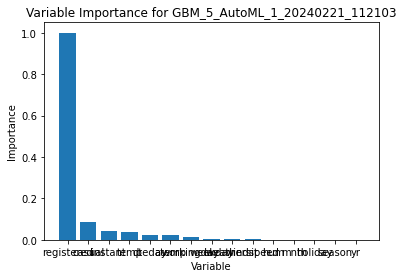

Variable importance plot for GBM_4_AutoML_1_20240221_112103:


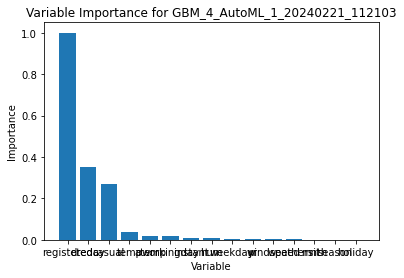

Variable importance plot for GBM_2_AutoML_1_20240221_112103:


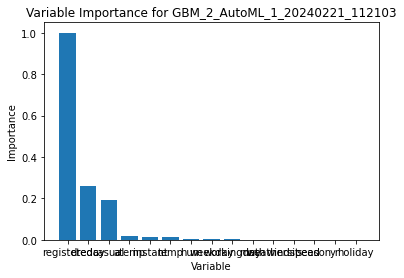

Variable importance plot for GBM_3_AutoML_1_20240221_112103:


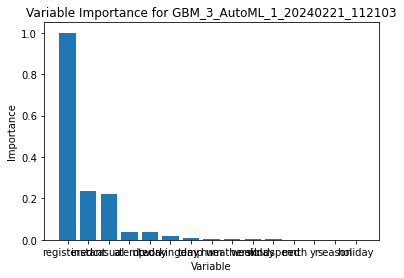

Variable importance plot for GBM_grid_1_AutoML_1_20240221_112103_model_1:


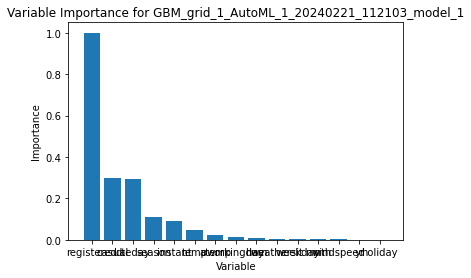

Variable importance plot for XRT_1_AutoML_1_20240221_112103:


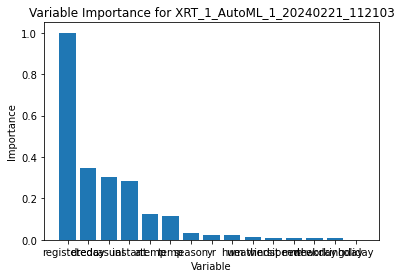

Variable importance plot for DRF_1_AutoML_1_20240221_112103:


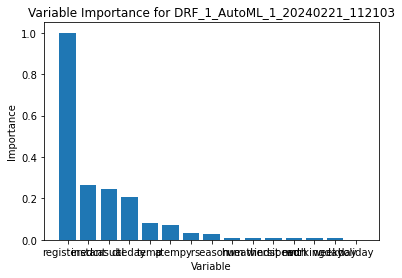

Variable importance plot for GBM_1_AutoML_1_20240221_112103:


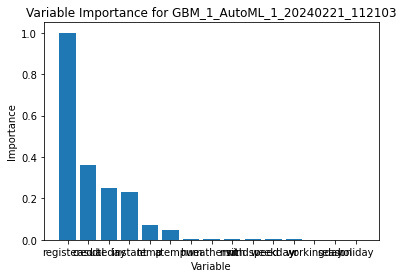

Variable importance plot for DeepLearning_1_AutoML_1_20240221_112103:


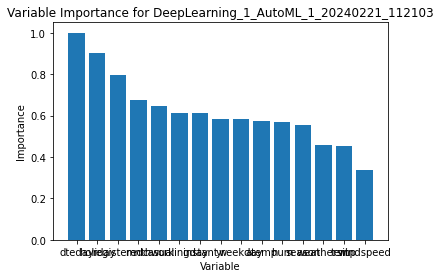

Variable importance plot for GLM_1_AutoML_1_20240221_112103:


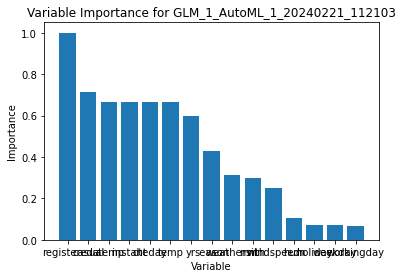

In [31]:
# For AutoML models
if aml_hourly.leader is not None:
    aml_hourly_leader = aml_hourly.leader
    try:
        if aml_hourly_leader.algo == "stackedensemble":
            # Get the base models in the stacked ensemble
            base_models = aml_hourly_leader.base_models
            # Loop through individual base models and generate variable importance plots
            for base_model_id in base_models:
                base_model = h2o.get_model(base_model_id)
                print(f"Variable importance plot for {base_model_id}:")
                varimps = base_model.varimp()
                # Extracting variable names and importance values
                variable_names = [var[0] for var in varimps]
                importance_values = [var[2] for var in varimps]
                # Plotting
                import matplotlib.pyplot as plt
                plt.bar(variable_names, importance_values)
                plt.xlabel('Variable')
                plt.ylabel('Importance')
                plt.title(f'Variable Importance for {base_model_id}')
                plt.show()
        else:
            aml_hourly_leader.varimp_plot()
    except Exception as e:
        print(f"Error: {e}")

if aml_daily.leader is not None:
    aml_daily_leader = aml_daily.leader
    try:
        if aml_daily_leader.algo == "stackedensemble":
            # Get the base models in the stacked ensemble
            base_models = aml_daily_leader.base_models
            # Loop through individual base models and generate variable importance plots
            for base_model_id in base_models:
                base_model = h2o.get_model(base_model_id)
                print(f"Variable importance plot for {base_model_id}:")
                varimps = base_model.varimp()
                # Extracting variable names and importance values
                variable_names = [var[0] for var in varimps]
                importance_values = [var[2] for var in varimps]
                # Plotting
                import matplotlib.pyplot as plt
                plt.bar(variable_names, importance_values)
                plt.xlabel('Variable')
                plt.ylabel('Importance')
                plt.title(f'Variable Importance for {base_model_id}')
                plt.show()
        else:
            aml_daily_leader.varimp_plot()
    except Exception as e:
        print(f"Error: {e}")



In [35]:
# Assuming 'base_model' is the H2O model you're interested in
varimp = base_model.varimp()
print(varimp)  



[('registered', 0.04174968972802162, 1.0, 0.1520884708701153), ('casual', 0.029708147048950195, 0.7115776726122741, 0.10822276013291629), ('atemp', 0.027865007519721985, 0.6674302899314604, 0.10150845220807352), ('instant', 0.02776641957461834, 0.665068884475614, 0.10114930966318948), ('dteday', 0.02776617929339409, 0.6650631291939384, 0.10114843435120004), ('temp', 0.0277075357735157, 0.6636584835484158, 0.10093480394285813), ('yr', 0.02502322383224964, 0.5993631089299932, 0.091156218733121), ('season', 0.017931340262293816, 0.42949637180797134, 0.06532144643253686), ('weathersit', 0.013131811283528805, 0.31453673953210187, 0.04783741174790911), ('mnth', 0.01236188318580389, 0.2960952109185813, 0.0450326678605713), ('windspeed', 0.0103563591837883, 0.248058350882481, 0.03772681527227905), ('hum', 0.0044449372217059135, 0.10646635341873101, 0.01619230489057207), ('holiday', 0.0030180588364601135, 0.07228937163656209, 0.01099437999236621), ('weekday', 0.0029781153425574303, 0.0713326341

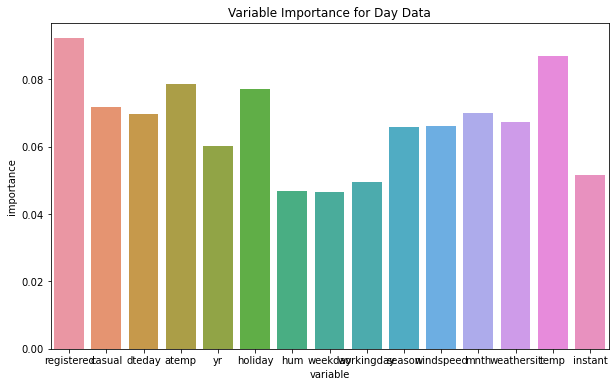

In [51]:
import pandas as pd

# Create a new dataframe with the correct column names
new_df = pd.DataFrame(columns=['variable', 'importance'])

# Assign the varimp data to the importance column
new_df['importance'] = varimp.iloc[:, 1]

# Set the variable names as the index of the new dataframe
new_df['variable'] = varimp.index

# Reset the index of the new dataframe
new_df = new_df.reset_index(drop=True)

# Plot the variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x="variable", y="importance", data=new_df)
plt.title("Variable Importance for Day Data")
plt.show()

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from eli5.sklearn import PermutationImportance

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor instance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Create a PermutationImportance instance
perm = PermutationImportance(model, random_state=42)

# Get feature importances
feature_importances = perm.fit(X_train, y_train)

# Print feature importances
print(feature_importances)

PermutationImportance(estimator=RandomForestRegressor(random_state=42),
                      random_state=42)


In [65]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [66]:
from eli5.sklearn import PermutationImportance

# Create a PermutationImportance instance
perm = PermutationImportance(model, random_state=42)

# Get feature importances
feature_importances = perm.fit(X_train, y_train)

# Print feature importances
print(feature_importances)

PermutationImportance(estimator=RandomForestRegressor(random_state=42),
                      random_state=42)


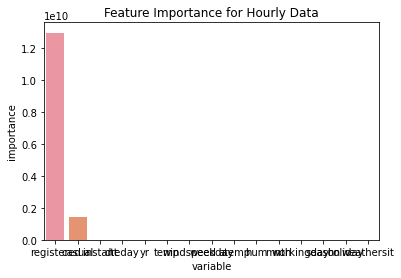

In [70]:
import pandas as pd

# Assuming feat_imp is a list of tuples
feat_imp_df = pd.DataFrame([(feat, imp) for feat, imp, _, _ in feat_imp], columns=['variable', 'importance'])

# Now you can use the DataFrame in the barplot function
sns.barplot(x="variable", y="importance", data=feat_imp_df)
plt.title("Feature Importance for Hourly Data")
plt.show()
